In [86]:
require("imputeTS")
dfDados=readRDS("dfDadosESC.norm.rds")
head(dfDados)
summary(dfDados)

dados,dia,hora,minuto,segundo,semana
0.1036690,1,0,0,0,3
0.1031480,1,0,0,10,3
0.1031480,1,0,0,20,3
0.1021805,1,0,0,30,3
0.1002456,1,0,0,40,3
0.1024782,1,0,0,50,3


     dados              dia            hora           minuto         segundo  
 Min.   :0.00000   Min.   : 1.0   Min.   : 0.00   Min.   : 0.00   Min.   : 0  
 1st Qu.:0.09169   1st Qu.: 8.0   1st Qu.: 5.75   1st Qu.:14.75   1st Qu.:10  
 Median :0.11647   Median :15.5   Median :11.50   Median :29.50   Median :25  
 Mean   :0.13358   Mean   :15.5   Mean   :11.50   Mean   :29.50   Mean   :25  
 3rd Qu.:0.14862   3rd Qu.:23.0   3rd Qu.:17.25   3rd Qu.:44.25   3rd Qu.:40  
 Max.   :1.00000   Max.   :30.0   Max.   :23.00   Max.   :59.00   Max.   :50  
     semana     
 Min.   :1.000  
 1st Qu.:2.000  
 Median :4.000  
 Mean   :3.967  
 3rd Qu.:6.000  
 Max.   :7.000  

In [88]:
plot1 = function (method, dia, piso,teto){
	dadoDia=dfDados$dados[which(dfDados$dia==dia)]
	dadoDiaTemp=dadoDia
	dadoDiaTemp[piso:teto]=NA #cria espaços em branco
    n=(as.numeric(teto)-as.numeric(piso))
    #plotNA.distribution(dadoDiaTemp)
    #statsNA(dadoDiaTemp)
   switch (method, 
    'linear_interpolation'=(dadoImputado=interpolationImputation(dadoDiaTemp, 1)),
    'spline_interpolation'=(dadoImputado=interpolationImputation(dadoDiaTemp, 2)),
    'stine_interpolation'=(dadoImputado=interpolationImputation(dadoDiaTemp, 3)),
    'kalmanSmoothing'=(dadoImputado=kalmanImputation(dadoDiaTemp)),
    'locf'=(dadoImputado=locfImputation(dadoDiaTemp)),
    'movingAverage_simple'=(dadoImputado=movingAverageImputation(dadoDiaTemp,1, n)),
    'movingAverage_linear'=(dadoImputado=movingAverageImputation(dadoDiaTemp,2, n)),
    'movingAverage_exponential'=(dadoImputado=movingAverageImputation(dadoDiaTemp,3, n)),
    'mean'=(dadoImputado=meanImputation(dadoDiaTemp, 1)),
    'median'=(dadoImputado=meanImputation(dadoDiaTemp, 2)),
    'mode'=(dadoImputado=meanImputation(dadoDiaTemp, 3))
        
    #'interpolate'=(dadoImputado=kalmanImput(dadoDiaTemp))
#    'interpolate'=(dadoImputado=kalmanImput(dadoDiaTemp))
 #   'interpolate'=(dadoImputado=kalmanImput(dadoDiaTemp))

       
       
       )

plotNA.imputations(dadoDiaTemp, dadoImputado,legend = TRUE, main = "Visualization Imputed Values with the method:", xlab = "Time",
ylab = "KW/H", colWithTruth = "black", colLines = "black",
colWithImputations = "indianred2", colWithNA = "black",
pch = 20, cex = 0.8)
}

#Uses Kalman Smoothing on structural time series models (or on the state space representation of an arima model) for imputation]
kalmanImputation= function(dadoTemp){
#Perform imputation with KalmanSmoother and state space representation of arima model
	dadoImputado=na_kalman(dadoTemp)
# : Perform imputation with KalmanSmooth and StructTS model
#	dadoImputado=na_kalman(dadoTemp,model = "StructTS", smooth = TRUE)
#Perform imputation with KalmanRun and state space representation of arima model
#	dadoImputado=na.kalman(dadoTemp, smooth=FALSE)
#	dadoImputado=na.kalman(dadoTemp, model = "StructTS", smooth = TRUE)
	return(dadoImputado)
}


#Missing Value Imputation by Interpolation
#Uses either linear, spline or stineman interpolation to replace missing values.
#Usage na_interpolation(x, option = "linear", maxgap = Inf, ...
#• "linear" - for linear interpolation using approx 
#• "spline" - for spline interpolation using spline 
#• "stine" - for Stineman interpolation using stinterp
interpolationImputation = function(dadoTemp, type) {
	if(type==1){
		dadoImputado=na.interpolation(dadoTemp)
	}else if(type==2){
		dadoImputado=na.interpolation(dadoTemp, option ="spline")
	}else if(type==3){
		dadoImputado=na.interpolation(dadoTemp, option ="stine")
	}
}

#Missing Value Imputation by Last Observation Carried Forward
#Replaces each missing value with the most recent present value prior to it (Last Observation Carried Forward- LOCF). 
#Optionally this can also be done starting from the back of the series (Next Observation Carried Backward - NOCB).

locfImputation = function (dadoTemp){
    dadoImputado=na.locf(dadoTemp)
}



#na_ma Missing Value Imputation by Weighted Moving Average
#Missing value replacement by weighted moving average. Uses semi-adaptive window size to ensure all NAs are replaced.
#na_ma(x, k = 4, weighting = "exponential", maxgap = Inf)
#integer width of the moving average window. Expands to both sides of the center
#element e.g. k=2 means 4 observations (2 left, 2 right) are taken into account. If
#increased until there are at least 2 non-NA values present.

#weighting Weighting to be used. Accepts the following input:
#• "simple" - Simple Moving Average (SMA) - all observations in the window are equally weighted for calculating the mean.

#• "linear" - Linear Weighted Moving Average (LWMA) - weights decrease in arithmetical progression. 
#The observations directly next to a central value i, have weight 1/2, the observations one further away (i-2,i+2) have weight 1/3, the next (i-3,i+3) have weight 1/4,

#• "exponential" - Exponential Weighted Moving Average (EWMA) - : uses weighting factors which decrease exponentially. 
#The observations directly next to a central value i, have weight 1/2^1, the observations one further away (i-2,i+2) have weight 1/2^2 ...

movingAverageImputation = function(dadoTemp, type, n){
	if(type==1){
		dadoImputado=na_ma(dadoTemp, weighting="simple", k=n)
	}else if(type==2){
		dadoImputado=na.ma(dadoTemp, weighting="linear", k=n)
	}else if(type==3){
		dadoImputado=na.ma(dadoTemp, weighting="exponential", k=n)
	}
}
#Missing value replacement by mean values. Different means like median, mean, mode possible.
meanImputation = function(dadoTemp, type){
	if(type==1){
		dadoImputado=na.mean(dadoTemp)
	} else if (type==2){
		dadoImputado=na.mean(dadoTemp, option="median")
	}else if(type==3){
		dadoImputado=na.mean(dadoTemp, option="mode")
	}
}

Warning message:
“na.mean will replaced by na_mean.
    Functionality stays the same.
    The new function name better fits modern R code style guidelines.
    Please adjust your code accordingly.”

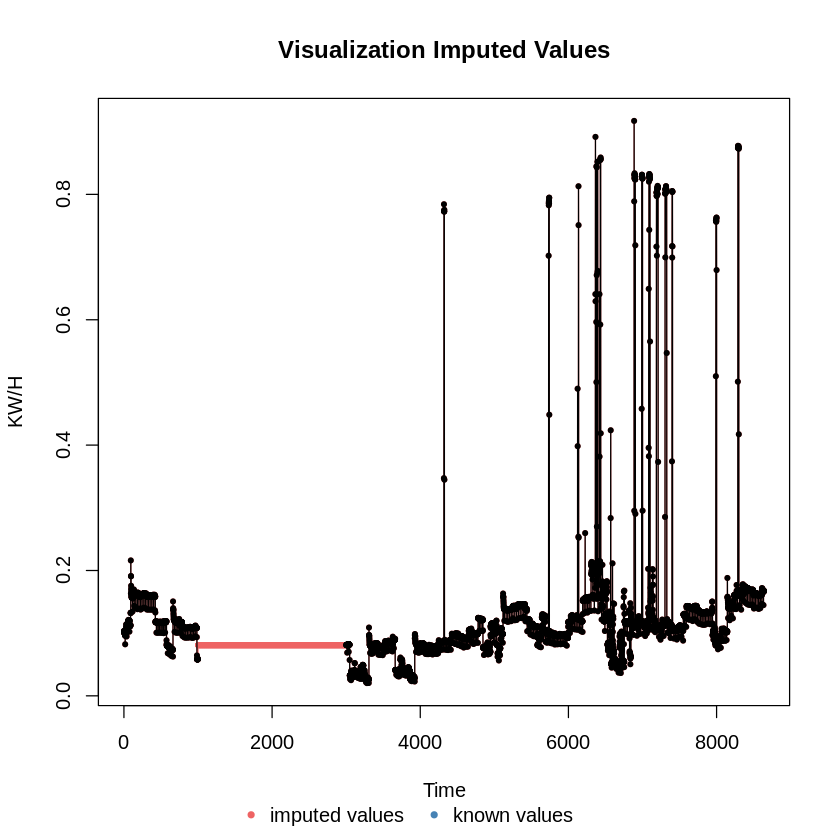

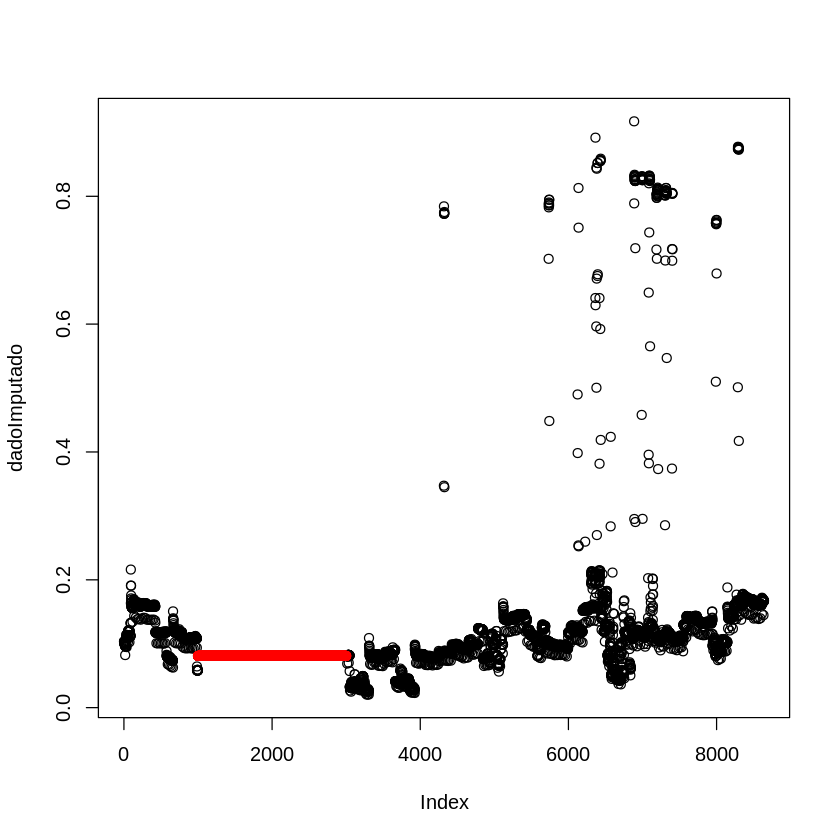

In [85]:
plot1('mode',1,1000,3000)


Warning message:
“na.mean will replaced by na_mean.
    Functionality stays the same.
    The new function name better fits modern R code style guidelines.
    Please adjust your code accordingly.”

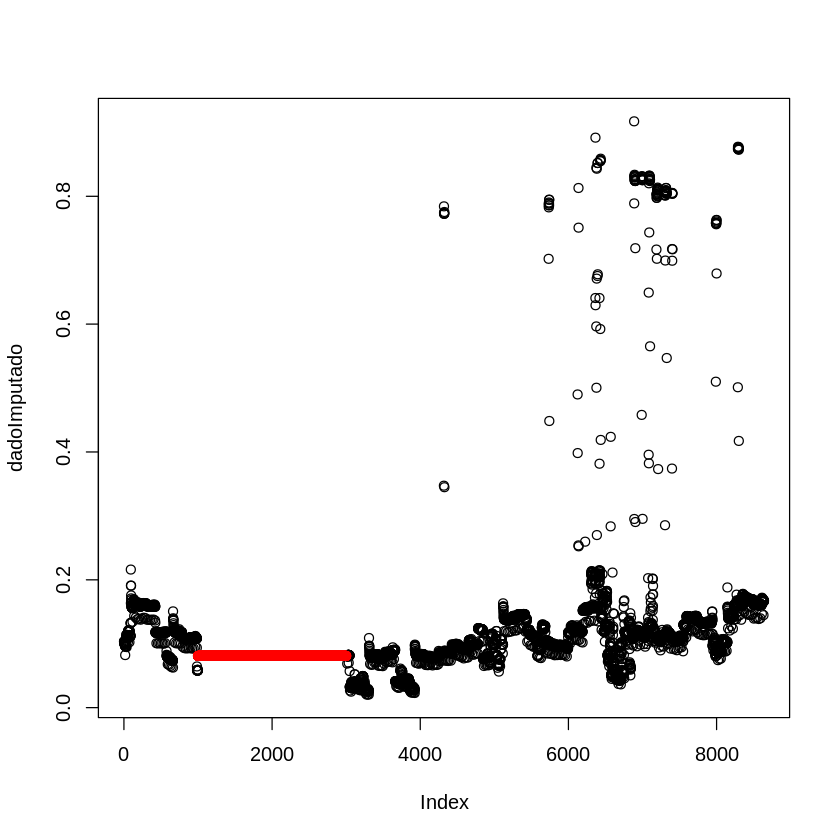

In [55]:
plot1('mode',1,1000,3000)


Warning message:
“na.mean will replaced by na_mean.
    Functionality stays the same.
    The new function name better fits modern R code style guidelines.
    Please adjust your code accordingly.”

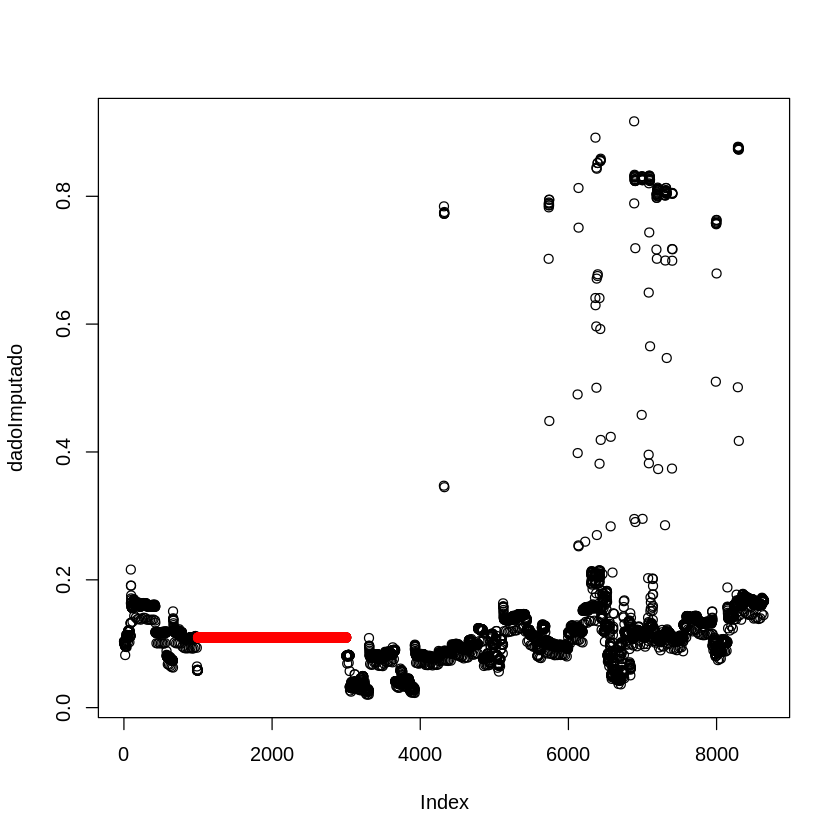

In [56]:
plot1('median',1,1000,3000)
